In [1]:
#importing packages

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Exploring the data from the Database

In [2]:
### Exploring the SQLITE SCHEMA

# Connect to the SQLite database 
conn = sqlite3.connect('../db/data.db')

# Query to get the sqlite schema
sqlitemaster_query = "SELECT * FROM sqlite_master;"


# Read the sqlite schema into a DataFrame
sqlitemaster_df = pd.read_sql_query(sqlitemaster_query, conn)

display(sqlitemaster_df)

,type,name,tbl_name,rootpage,sql
0,table,homes,homes,2,"CREATE TABLE ""homes"" (\n""id"" TEXT,\n ""multipl..."
1,table,motion,motion,5,"CREATE TABLE ""motion"" (\n""id"" TEXT,\n ""home_i..."
2,table,final_table,final_table,14939,"CREATE TABLE ""final_table"" (\n""WC1"" REAL,\n ""..."


### There are two tables in the Database
1. homes
2. motion

In [9]:
# Exploring homes table from SQLITE db
homes_query = "SELECT * FROM homes;"

# Read the sqlite schema into a DataFrame
homes_df = pd.read_sql_query(homes_query, conn)

display(homes_df)

,id,multiple_occupancy
0,dc922bd9bf8a2a9437642fe0dce9dcaa,0
1,d40fc88629271da7b5833ed3f3222d17,1
2,3fb064da180f02862063eca8e3b609c0,1
3,16d71b9c46d9abd765bf395818efe527,0
4,458264665736fd26184a8ea5641e6c48,1
...,...,...
101,dbe580ed60d7c329931d98a0e2ad0ea3,1
102,04a16138cd7e0fa768858ff7c02856d8,1
103,62c8145530aca30cb0455dc386c0a9d6,1
104,3a5cc5ac41ab3b18b63d6d8366e30fb0,1


In [10]:
# Exploring motion table from SQLITE db
motion_query = "SELECT * FROM motion;"

# Read the sqlite schema into a DataFrame
motion_df = pd.read_sql_query(motion_query, conn)

display(motion_df)

,id,home_id,datetime,location
0,e41218b439d933a1cd9ad158f78e9198,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:00:10+00,lounge
1,92d48d869ae50b0764cfb8d70494f618,7d2f2e0a9e059b4fb8106bb0ad4b8a39,2024-01-01 00:00:17+00,lounge
2,65c18ba64884442dd47c2fd4cf3630e4,44a880cc6fc3a7db3464092f650ae7f1,2024-01-01 00:00:18+00,lounge
3,90d6336d189c929aa50fa08e5aee5f41,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:00:43+00,lounge
4,6e3d73bed24b95ffdfe5ec017787f039,14328a0b7574e912c2e23d62c9476a07,2024-01-01 00:00:57+00,lounge
...,...,...,...,...
580312,5ec75a93dcc136e6a4c7a4483d60b2ed,3a1f53e2e242bff03301a250135f894b,2024-01-31 23:58:26+00,bathroom1
580313,406c70038a540d29b1e68250d5ed341c,37b99328702f9fdc68c431a4ac450f2e,2024-01-31 23:58:36+00,kitchen
580314,5168c52c3c022d747c81a6e6ce868e3f,3a1f53e2e242bff03301a250135f894b,2024-01-31 23:59:02+00,bedroom1
580315,40cad449e7cef4164b02672e8caff379,2b5ce37a65e82735416d69b987d99fe8,2024-01-31 23:59:09+00,hallway


In [11]:
# combining the tables based on their IDs
combined_df = pd.read_sql('SELECT motion.*, homes.multiple_occupancy FROM motion \
            JOIN homes \
            ON homes.id = motion.home_id', conn)
combined_df

,id,home_id,datetime,location,multiple_occupancy
0,e41218b439d933a1cd9ad158f78e9198,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:00:10+00,lounge,1
1,92d48d869ae50b0764cfb8d70494f618,7d2f2e0a9e059b4fb8106bb0ad4b8a39,2024-01-01 00:00:17+00,lounge,1
2,65c18ba64884442dd47c2fd4cf3630e4,44a880cc6fc3a7db3464092f650ae7f1,2024-01-01 00:00:18+00,lounge,1
3,90d6336d189c929aa50fa08e5aee5f41,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:00:43+00,lounge,0
4,6e3d73bed24b95ffdfe5ec017787f039,14328a0b7574e912c2e23d62c9476a07,2024-01-01 00:00:57+00,lounge,1
...,...,...,...,...,...
580312,5ec75a93dcc136e6a4c7a4483d60b2ed,3a1f53e2e242bff03301a250135f894b,2024-01-31 23:58:26+00,bathroom1,0
580313,406c70038a540d29b1e68250d5ed341c,37b99328702f9fdc68c431a4ac450f2e,2024-01-31 23:58:36+00,kitchen,0
580314,5168c52c3c022d747c81a6e6ce868e3f,3a1f53e2e242bff03301a250135f894b,2024-01-31 23:59:02+00,bedroom1,0
580315,40cad449e7cef4164b02672e8caff379,2b5ce37a65e82735416d69b987d99fe8,2024-01-31 23:59:09+00,hallway,0


### Data Sanity check. Making sure that there are no issues in the data using the assert statements


In [12]:
## Checking if there are any unique ids and unique values of the multiple occupancy

assert len(homes_df['id']) == len(set(homes_df['id'])), "Test did not passed: There are duplicates in the database"

In [13]:
## Checking if there are only two class labels: 0 and 1

assert set(homes_df['multiple_occupancy']) == {0, 1}, "Test did not passed: There are more values than 0 and 1"

In [14]:
## Checking if the number of unique home ids in the motion table is same as in the homes table

assert len(set(homes_df['id'])) == len(set(motion_df['home_id'])), \
            f"There are {len(set(homes_df['id']))} home ids in the home table while there are unique {len(set(motion_df['home_id']))} home ids in the motion table"

AssertionError: There are 106 home ids in the home table while there are unique 50 home ids in the motion table

In [15]:
## Checking if all the home IDs are present in the motion table

assert len(set(homes_df['id']).intersection(set(motion_df['home_id']))) == len(set(motion_df['home_id'])), \
            'There are homes id in the motion table not available in the homes table'

In [16]:
## Checking if all the motion ids are unique

assert len(motion_df['id']) == len(set(motion_df['id'])), \
        "Test did not passed: There are duplicates in the sensor ids"

In [17]:
## Checking if there are any null values in the combined table

assert len(combined_df.dropna()) == len(combined_df), "There seems to be null values in the dataframe"

In [18]:
## Checking if there are home ids with single and multiple occupancy at the same time in the combined table

occupancy_1_df = combined_df[combined_df['multiple_occupancy'] == 1]
occupancy_0_df = combined_df[combined_df['multiple_occupancy'] == 0]

assert len(set(occupancy_1_df['home_id']).intersection(set(occupancy_0_df['home_id']))) == 0, \
        "There are home IDs that has both occupancy labels in the database"

assert len(set(occupancy_0_df['home_id']).intersection(set(occupancy_1_df['home_id']))) == 0, \
        "There are home IDs that has both occupancy labels in the database"

### Data Analysis on the location field

In [19]:
def pie_plot(df:pd.DataFrame, field:str) -> None:
    #Pie chart of the sensor frequency based on the field among the occupant types #
    
    plt.figure(figsize=(7, 7))
    
    field_prop = df[field].value_counts()/len(df)
    pie = plt.pie(field_prop, labels=field_prop.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart: The sensor frequency based on the {field}')
    plt.show()


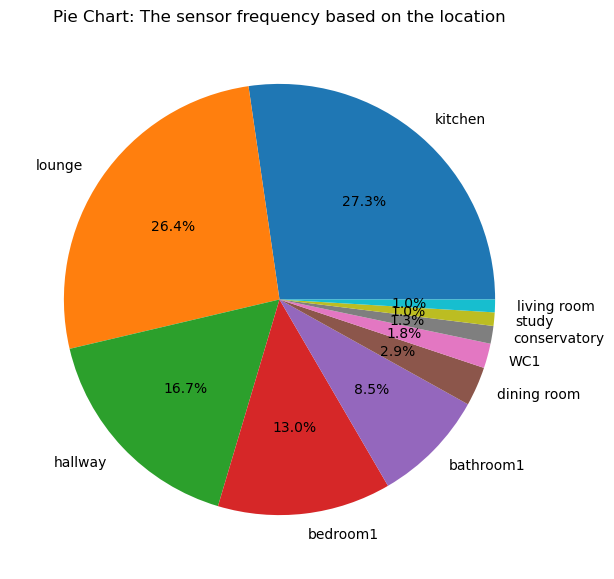

In [20]:
pie_plot(combined_df, 'location') #pie chart of the location in the combined_df

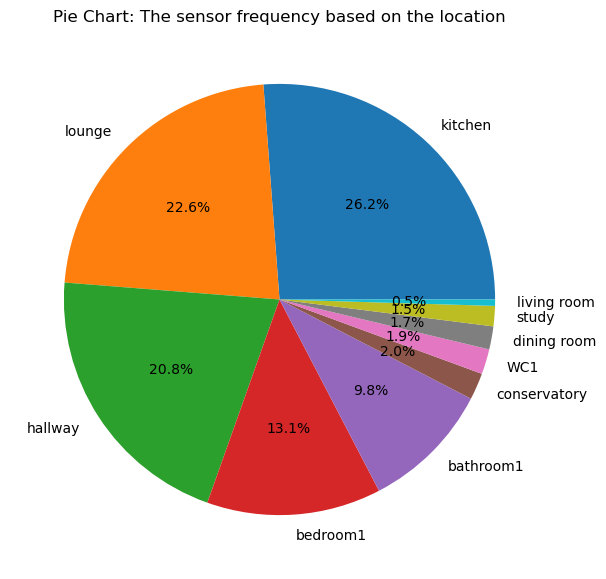

In [21]:
pie_plot(occupancy_1_df, 'location') #pie chart of the location among the multiple occupants

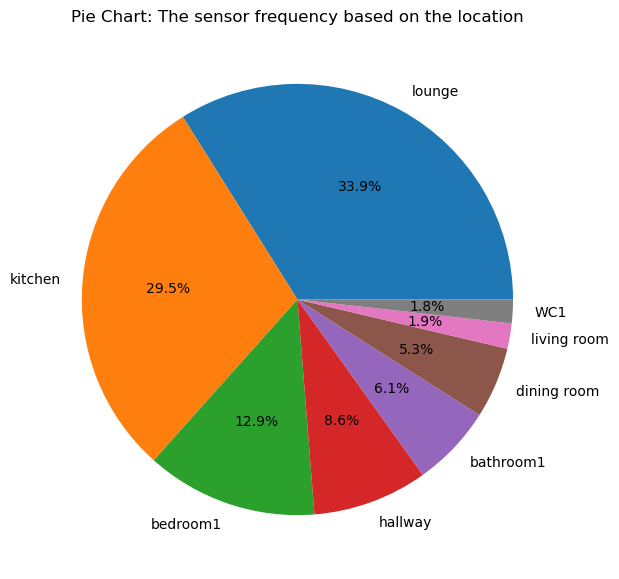

In [22]:
pie_plot(occupancy_0_df, 'location') #pie chart of the location among the single occupants

## Data Analysis Insights
### There's less proportional frequency in hallway for single occupants
### Proportional frequency of the bedroom1 is almost the same among both types of occupants
### There are no study and conservatory locations for the single occupants. This is strong indicator if the occupant is single or multiple

### Data Analysis on Datetime field

In [23]:
combined_df['datetime'] = pd.to_datetime(combined_df['datetime']) #changing the dataype from object to datetime 

years_list = list(set(combined_df['datetime'].dt.year))
months_list = list(set(combined_df['datetime'].dt.month))
days_list = list(set(combined_df['datetime'].dt.day))
days_names = (set(combined_df['datetime'].dt.day_name()))

print(f"The sensor data consists of {len(years_list)} number of years. The year(s) are {years_list}\n")
print(f"The sensor data consists of {len(months_list)} number of months. The month(s) are {months_list}\n")
print(f"The sensor data consists of {len(days_list)} number of days. The day(s) are {days_list}\n")
print(f"The sensor data consists of {len(days_names)} number of days in the week. The day(s) of the week are {days_names}\n")


The sensor data consists of 1 number of years. The year(s) are [2024]

The sensor data consists of 1 number of months. The month(s) are [1]

The sensor data consists of 31 number of days. The day(s) are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

The sensor data consists of 7 number of days in the week. The day(s) of the week are {'Thursday', 'Tuesday', 'Saturday', 'Sunday', 'Monday', 'Wednesday', 'Friday'}



In [24]:
combined_df['day_of_month'] = combined_df['datetime'].dt.day
combined_df['days'] = combined_df['datetime'].dt.day_name()
Counter(combined_df['days']) #hashmap with key as day and value as sensor frequency

Counter({'Tuesday': 96182,
         'Monday': 95204,
         'Wednesday': 95083,
         'Saturday': 74440,
         'Thursday': 74439,
         'Friday': 72945,
         'Sunday': 72024})

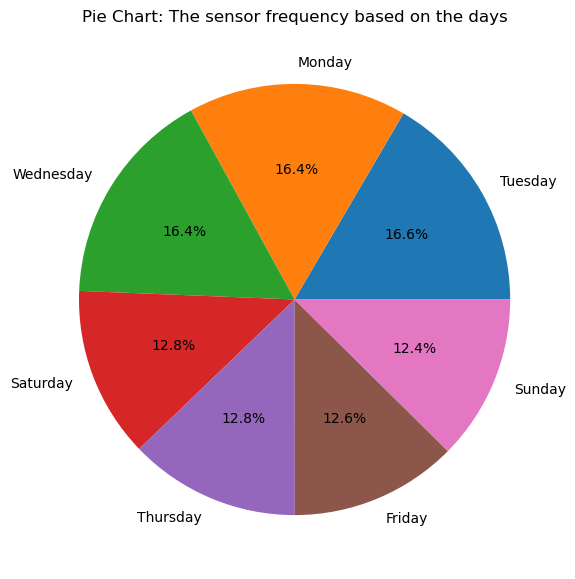

In [25]:
pie_plot(combined_df, 'days') #pie chart of the days among the all the occupants

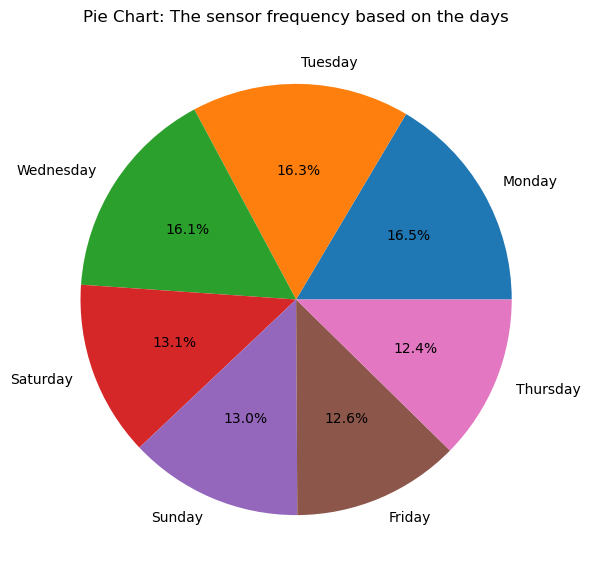

In [26]:
#pie chart of the days among the single occupants
pie_plot(combined_df[combined_df['multiple_occupancy'] == 0], 'days') 

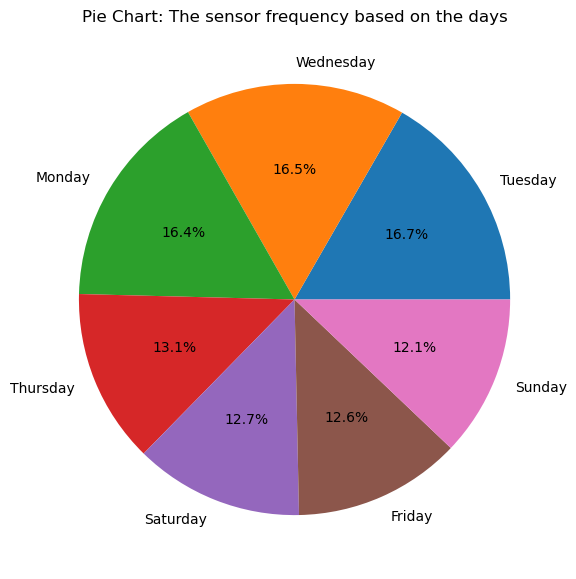

In [27]:
#pie chart of the days among the multiple occupants
pie_plot(combined_df[combined_df['multiple_occupancy'] == 1], 'days') 

## Data Analysis Insight

### Proportional Frequency of the Sensor Distribution seems to be same for the single and multiple occupants across the days in the week

## Creating new columns from the datetime field


In [28]:
# Extract hours, minutes, and seconds
combined_df['hours'] = combined_df['datetime'].dt.hour
combined_df['minutes'] = combined_df['datetime'].dt.minute
combined_df['seconds'] = combined_df['datetime'].dt.second

# Convert total time to minutes
combined_df['minute_of_day'] = (combined_df['hours'] * 60) + combined_df['minutes'] + (combined_df['seconds'] / 60)
combined_df['minute_of_day']

0            0.166667
1            0.283333
2            0.300000
3            0.716667
4            0.950000
             ...     
580312    1438.433333
580313    1438.600000
580314    1439.033333
580315    1439.150000
580316    1439.200000
Name: minute_of_day, Length: 580317, dtype: float64

In [29]:
combined_df['mins_per_day'] = combined_df.groupby(['home_id', 'location', 'day_of_month'])['minute_of_day'].diff()

## Data Analysis by looking at each individual Home ID patterns

### Here we see that there's an pattern in which single occupant sensor registers when the single occupant enters the location. And then the occupant leaves the location which is registered by the sensor before entering into the new location


In [30]:
display(combined_df[combined_df['home_id'] == '49b83fce41b676266b98cd1e095f1c11']) #single occupant

,id,home_id,datetime,location,multiple_occupancy,day_of_month,days,hours,minutes,seconds,minute_of_day,mins_per_day
3,90d6336d189c929aa50fa08e5aee5f41,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:00:43+00:00,lounge,0,1,Monday,0,0,43,0.716667,NaN
11,7e7c811d7d5344a5422900ef45cc8833,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:01:40+00:00,lounge,0,1,Monday,0,1,40,1.666667,0.950000
25,be6a0137c30654c4809da9a60167680e,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:04:54+00:00,bedroom1,0,1,Monday,0,4,54,4.900000,NaN
29,70e856aca432c526b040dd7add4a8c2c,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:05:40+00:00,bedroom1,0,1,Monday,0,5,40,5.666667,0.766667
32,6740a971e1cbdd41c07cdec4f2b503a8,49b83fce41b676266b98cd1e095f1c11,2024-01-01 00:06:12+00:00,bathroom1,0,1,Monday,0,6,12,6.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
579881,460fd231957b757c836ef9b0af134c26,49b83fce41b676266b98cd1e095f1c11,2024-01-31 22:47:28+00:00,hallway,0,31,Wednesday,22,47,28,1367.466667,132.916667
579882,f32632d64d23551dde124f5129d66140,49b83fce41b676266b98cd1e095f1c11,2024-01-31 22:47:32+00:00,kitchen,0,31,Wednesday,22,47,32,1367.533333,134.266667
579892,4995461dcbe9a8e18683961df1863fb1,49b83fce41b676266b98cd1e095f1c11,2024-01-31 22:47:58+00:00,hallway,0,31,Wednesday,22,47,58,1367.966667,0.500000
579912,0fb5188cd846ac750b8b1f266489173b,49b83fce41b676266b98cd1e095f1c11,2024-01-31 22:49:57+00:00,bathroom1,0,31,Wednesday,22,49,57,1369.950000,10.616667


### Whereas, sensor registers multiple locations when multiple occupants enter into those locations even if those occupants may not left for other locations

In [31]:
display(combined_df[combined_df['home_id'] == '205c42ec747e2db13cb92087a99433f1']) #multiple occupants

,id,home_id,datetime,location,multiple_occupancy,day_of_month,days,hours,minutes,seconds,minute_of_day,mins_per_day
0,e41218b439d933a1cd9ad158f78e9198,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:00:10+00:00,lounge,1,1,Monday,0,0,10,0.166667,NaN
7,321d24f5a5210ba1e11f0beb11702e41,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:01:24+00:00,bedroom1,1,1,Monday,0,1,24,1.400000,NaN
18,7bdf72b2919d9886691a4a74fc2a3073,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:02:30+00:00,lounge,1,1,Monday,0,2,30,2.500000,2.333333
26,d042438d1734cd8eda1e742f82ec9738,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:05:00+00:00,lounge,1,1,Monday,0,5,0,5.000000,2.500000
30,9db392a6cf40fb75a92dfb1e25f9be48,205c42ec747e2db13cb92087a99433f1,2024-01-01 00:05:43+00:00,lounge,1,1,Monday,0,5,43,5.716667,0.716667
...,...,...,...,...,...,...,...,...,...,...,...,...
580114,b1303ba1ddbef6b96b15777451d8e6c8,205c42ec747e2db13cb92087a99433f1,2024-01-31 23:11:34+00:00,kitchen,1,31,Wednesday,23,11,34,1391.566667,94.333333
580122,d7dadcd846dbe4f27035933843a9eadc,205c42ec747e2db13cb92087a99433f1,2024-01-31 23:12:40+00:00,kitchen,1,31,Wednesday,23,12,40,1392.666667,1.100000
580140,9870cd7ebfe1a7b0d195d1cbc7403730,205c42ec747e2db13cb92087a99433f1,2024-01-31 23:14:41+00:00,kitchen,1,31,Wednesday,23,14,41,1394.683333,2.016667
580161,aa24c6cafd8a4d9b6853ee466ad53d2a,205c42ec747e2db13cb92087a99433f1,2024-01-31 23:17:04+00:00,kitchen,1,31,Wednesday,23,17,4,1397.066667,2.383333


### To avoid the curse of the dimensionality only the location field is considered with their frequency as features. Otherwise we may end up with the more features than the data points.

In [32]:
features_df = combined_df[['home_id', 'location']].value_counts().reset_index()
features_df = features_df.pivot(index='home_id', columns='location', values='count')
features_df = features_df.fillna(0)

In [33]:
features_df #Features to be used to train the ML

location,WC1,bathroom1,bedroom1,conservatory,dining room,hallway,kitchen,living room,lounge,study
home_id,,,,,,,,,,
0904961f621c9bd03542b43b992ec431,0.0,2.0,0.0,0.0,0.0,1315.0,2125.0,0.0,0.0,0.0
0f44ff9edd221e417195f4398d2f3853,0.0,609.0,1110.0,0.0,0.0,4156.0,4697.0,0.0,3299.0,1432.0
14328a0b7574e912c2e23d62c9476a07,415.0,1349.0,1544.0,0.0,373.0,3877.0,3001.0,0.0,3758.0,1660.0
15663392d490688cd4b0e5aa3d5b6ef3,0.0,592.0,1363.0,0.0,0.0,510.0,3346.0,0.0,485.0,0.0
16d71b9c46d9abd765bf395818efe527,0.0,1546.0,359.0,0.0,0.0,191.0,0.0,0.0,4684.0,0.0
205c42ec747e2db13cb92087a99433f1,480.0,782.0,1702.0,3051.0,0.0,1237.0,3466.0,0.0,5473.0,0.0
20a3ebd4470c712d6f6d99908d931e09,0.0,0.0,1412.0,0.0,0.0,0.0,3753.0,0.0,2001.0,0.0
2739e3f7409068a94cf6e3eac643c2e7,0.0,1875.0,4033.0,0.0,0.0,8220.0,6373.0,0.0,0.0,0.0
2a035e0f88dd05d3c5e61ebee0531a4c,0.0,0.0,2151.0,0.0,0.0,1428.0,2958.0,0.0,840.0,0.0


In [34]:
## Merging the homes table with the features table

homes_df = homes_df.set_index('id')
final_df = pd.merge(features_df, homes_df, left_on='home_id', right_on='id', how='inner')
final_df

,WC1,bathroom1,bedroom1,conservatory,dining room,hallway,kitchen,living room,lounge,study,multiple_occupancy
0,0.0,2.0,0.0,0.0,0.0,1315.0,2125.0,0.0,0.0,0.0,0
1,0.0,609.0,1110.0,0.0,0.0,4156.0,4697.0,0.0,3299.0,1432.0,1
2,415.0,1349.0,1544.0,0.0,373.0,3877.0,3001.0,0.0,3758.0,1660.0,1
3,0.0,592.0,1363.0,0.0,0.0,510.0,3346.0,0.0,485.0,0.0,1
4,0.0,1546.0,359.0,0.0,0.0,191.0,0.0,0.0,4684.0,0.0,0
5,480.0,782.0,1702.0,3051.0,0.0,1237.0,3466.0,0.0,5473.0,0.0,1
6,0.0,0.0,1412.0,0.0,0.0,0.0,3753.0,0.0,2001.0,0.0,0
7,0.0,1875.0,4033.0,0.0,0.0,8220.0,6373.0,0.0,0.0,0.0,1
8,0.0,0.0,2151.0,0.0,0.0,1428.0,2958.0,0.0,840.0,0.0,0
9,7.0,797.0,1271.0,0.0,0.0,291.0,151.0,0.0,1993.0,0.0,0


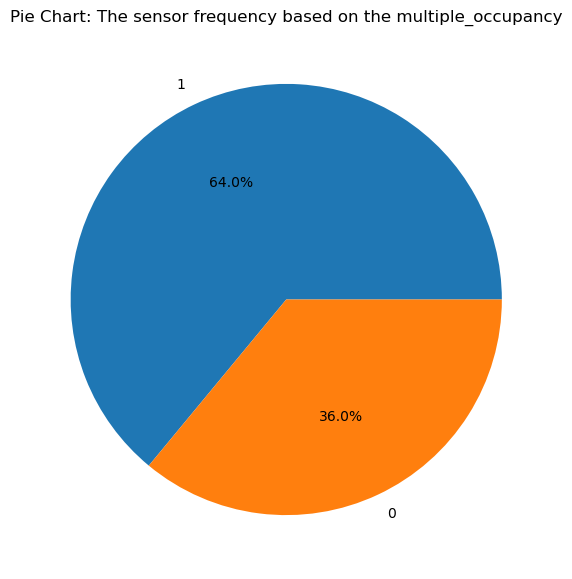

In [35]:
pie_plot(final_df, 'multiple_occupancy') #pie chart based on the occupancy type

### There is a class imbalance issue that needs to be considered when building the ML. This means that we need to evaluate ML based not only on the Accuracy but also other metrics like Precision, Recall, F1 and Confusion Metrics

In [92]:
#putting final table on to the database

final_df.to_sql('final_table', conn, index=False)

50

## Closing the Database connection gracefully

In [ ]:
conn.close()